<h1 align="center">Advanced Linear Regression </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(9)

Text(0.5, 1.0, 'Random Plot')

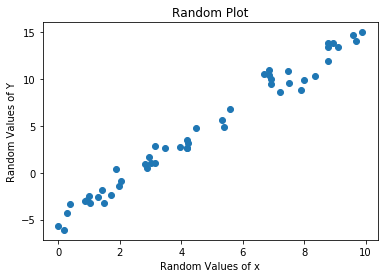

In [5]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot")

## Fitting a line on the random data

 fit a Linear regression model and check how it fits the data.

In [6]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

model coeff: 2.03
model intercept: -5.00


Text(0.5, 1.0, 'Random Plot')

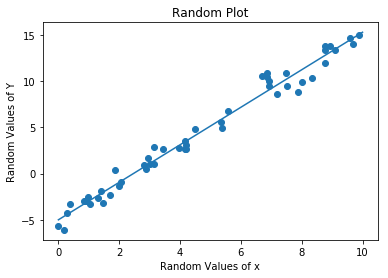

In [7]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True, normalize=False)

model1.fit(x[:, np.newaxis], y)

xfit1 = np.linspace(0, 10, 50)
yfit1 = model1.predict(xfit1[:, np.newaxis])
print ("model coeff: {0:.2f}".format(model1.coef_[0]))
print ("model intercept: {0:.2f}".format(model1.intercept_))

plt.scatter(x, y)
plt.plot(xfit1, yfit1);
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot")

As expected, the linear model does an extremely poor job of explaining the target variable. Hence, fitting a linear line to such a nonlinear data *oversimplifies* the model.

This is known as **underfitting**

 - Let's try and understand what underfitting is

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Underfitting
***
<br/>
Underfitting is when the the model *fails to capture the overall 'trend' of the data.*

A model that underfits is said to have **high bias.**

- It is the difference between predictions and truths using models trained by specific learning algorithm

- Error due to bias is because we assume that simple linear model will fit to non linear data distribution  while specifying the  algorithm

- Basically, we are biased toward the data having a linear trend and we hypothesize that our target variable increases linearly EVEN THOUGH WE CAN SEE A CLEAR NON-LINEAR TREND 



<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>

## Polynomial Basis Function with sklearn
***
<br />

* In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form 

* In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

 this is what is known as polynomial basis function  
 
* Polynomial projection is built into Scikit-Learn, using the ``Polynomial Features`` transformer:

## What is a Polynomial Feature Transformer? 

 - This is nothing but taking the *n-th* degree of your variable
 - Below is an easy example to display what it does
     - Say we wanted to take the 1st, 2nd and 3rd degree of the numbers 2,3 & 4. 
     - Intuitively we know that for 2 the 1st, 2nd and 3rd degrees are: 2, 4 $(2^2)$ and 8 $(2^3)$
 
 - Let's try and understand the code below: 

In [8]:
#code to improvise polynomial regression model and increase the accuracy 

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
poly

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

Here the 3 in "PolynomialFeatures(3, include_bias=False)" is basically the value of degree of the polynomials up to which we want our data to be transformed to 

- We can see 3 values for 2,3 and 4. For example: $4^1$ (4), $4^2$ (16) and $4^3$ (64)

**Now, decides to use the same technique to create a 7th-degree polynomial model for the non-linear data that he generated  earlier **

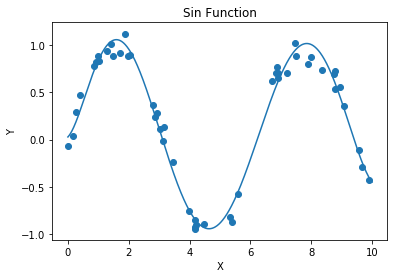

In [9]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

7th-order polynomial basis function can provide an excellent fit to this non-linear data.

There are many advantages of using Polynomial Regression as-
-  Broad range of functions can be fit over model
-  Polynomial fit a wide range of curvature 
-  It provides good approximation of the relationship and makes the transformation more interpretable.

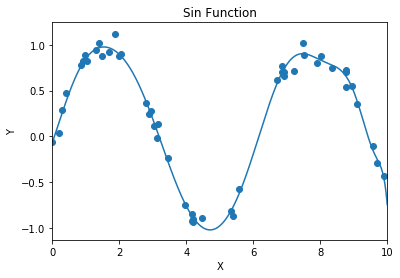

In [10]:
# added a 18th degree polynomial feature

higher_polynomial = make_pipeline(PolynomialFeatures(15), LinearRegression())
higher_polynomial.fit(x[:, np.newaxis], y)
yfit = higher_polynomial.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

## Important Concept

**In the plot below, we can see how the model fits almost all the data points exactly if we introduce further higher degree polynomials **

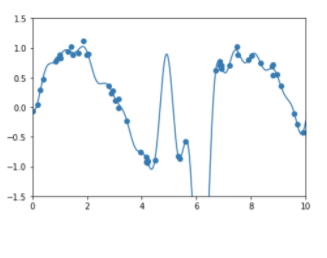

## What's going on?

Here, it seems like the model is learning `too much` from the data

*Not only is it learning legit data but also learning the noise.*

Such a model is said to be **overfitting**.

 - Let's try and understand what Overfitting is and how this applies to our example? 
 


## **Intutive Definition of Overfitting**
***
Overfitting occurs when your model follows the training dataset very rigorously i.e low training error, but it may not work well on generalized or test dataset i.e. high generalization error. 

For example- It's like a person cramming word to word from a book while studying for his exams. If the questions in the test are straight as is within the book, he will do well, else if the questions are more based on usage of multiple concepts outlined in the book he studied, the person may struggle.

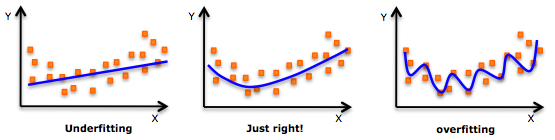
An overfitting model is said to have high variance.

We will discuss about bias and variance soon.


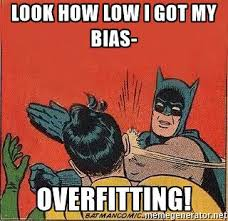

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

# L1 Regularization (also called as Lasso penalisation)
***
<br />

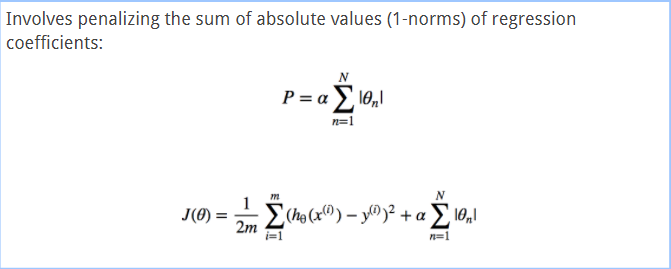

## Understanding L1

 - Here we are familiar with the First half of the Cost Function. We studied this yesterday
 
 - By adding all thetas to the cost function, which we want to minimize, we're adding further restrictions on these parameters
 
 - Notice how Theta_0 is not there as we're not penalizing our Intercept

## More on Lasso

- With the lasso regression penalty, the majority of the coefficients are exactly zero
- The  α  parameter tunes the strength of the penalty, and should be determined via cross-validation. (What is cross-validation? Later in this lecture)

- Let's use Lasso on our model and see how it performs 

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


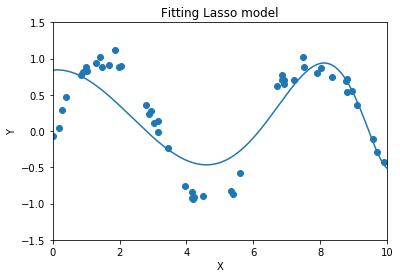

In [11]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.01))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Lasso model");

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

# L2 Regularization (also called as Ridge penalisation) 
***
<br />

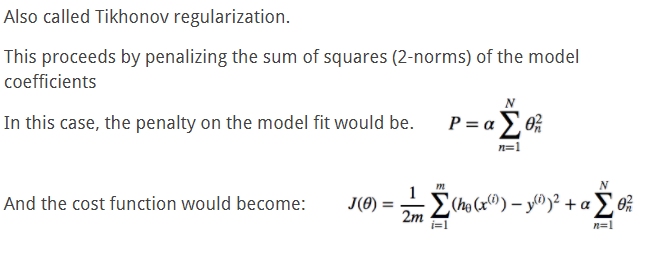



## L2 Regularization

- The L2 regularization will force the parameters to be relatively small, the bigger the penalization, the smaller (and the more robust to overfitting) the coefficients are
- Here we are considering every feature but we are penalizing the coefficients based on how significant the feature is

Here,  α is a hyper-parameter that controls the strength of the penalty.
The  α parameter controls complexity of the resulting model.
- In the limit  α→0 , we recover the standard linear regression result.
- In the limit  α→∞ , all model responses will be suppressed.

Ridge regression can be computed very efficiently at hardly more computational cost than the original linear regression model.
This type of penalized model is built into Scikit-Learn with the Ridge estimator.

- Let's see how to implement this and get our coefficients 

Text(0.5, 1.0, 'Fitting Ridge model')

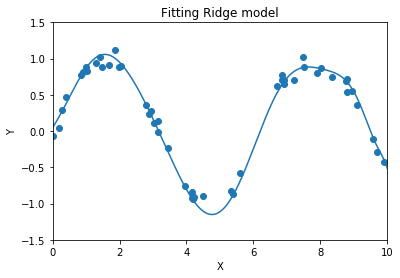

In [12]:
#code to implement l2 and to from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(16), Ridge(alpha=0.1))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Ridge model")

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## L1 vs L2 Regularization (1/2)
***
<br />
* **Built-in feature selection**

* As we increased the value of alpha, coefficients were approaching towards zero rather quickly, 

**but ** 
* if you see in case of lasso, even at smaller alpha's, our coefficients are reducing to absolute zeros. 

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## L1 vs L2 Regularization
***
<br />
** Therefore **, 
* Lasso Regression technique selects only some feature while it reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

- A result of this, we tend to get a lot of 0s! 
- This doesn't necessarily happen in case of L2 - Ridge Regression

## Summary
***
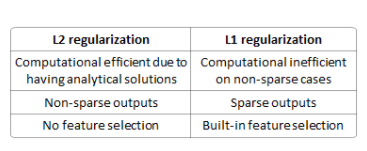

<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>

## Elastic-net
***
<br />

Elastic Net regularization is the combination of both L1 and L2 regulrization.

$$P = \alpha \displaystyle\sum^{N}_{n=1}{|\theta_n|} + (1 -\alpha) \displaystyle\sum^{N}_{n=1}{\theta_n^2}$$

* Elastic Net generally seems to perform better than both the individual L1 and L2 regularizations. 
* However, it is computationally more expensive

## How does Elastic Regression work?

* So Let's say, we have a bunch of correlated independent variables in a dataset, 
* Then elastic net will simply form a group consisting of these correlated variables. 
* Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, 
* Because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.So it results out as bias and variance balance trade off with manipulating the  $\alpha$  which improves the model performance and reduces complexity.

 - Let's check how Elastic Net does. 
 - As done earlier, we'll check the coefficients and a plot to see the trend in the coefficients 

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


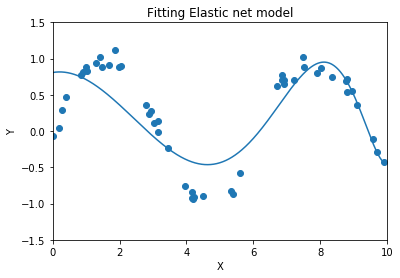

In [13]:
#code to implement ElasticNet
from sklearn.linear_model import ElasticNet
model = make_pipeline(PolynomialFeatures(16), ElasticNet(alpha=1e-7))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Elastic net model");

[ 0.00000000e+00  8.17475348e-02 -2.01133215e-01  2.18404770e-02
  1.21758217e-03  1.26013432e-05 -4.51928027e-06 -6.31355302e-07
 -5.90524436e-08 -4.53182142e-09 -2.89325397e-10 -1.33629604e-11
 -5.77829739e-15  1.05943941e-13  1.87141952e-14  2.46335124e-15
  2.87423490e-16]


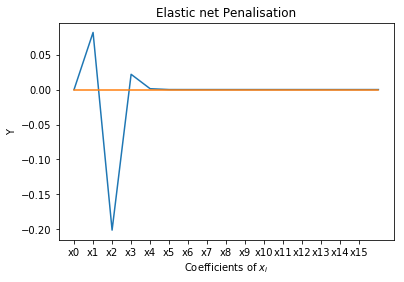

In [14]:
#graph to show improvisation of elastic net 
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef))
plt.xticks(range(16),('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15'))
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Elastic net Penalisation')

print(coef)

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px; float:left; margin-right:15px"/>


## Bias - Variance -Trade off
***
<br />
* Now as understood regularization and also implemented the models and checked how the model fits the data.

* But he is still confused, how to decide whether the model is overfitting or underfitting.

* So his friend introduced one more concept or method to understand it, which is known as Bias - Variance -Trade off.



## Bias-Variance Trade-off 

* So whenever we fit a model to a data, we can notice two properties; bias, giving us a some kind of measure on the model’s predictions’ average closeness to training data and variance, deviation of the predictions by model from the original data.

*  If we fit a model with a low complexity, it will not follow the real trend in the data and  model introduces high bias.

* This high bias in our model will not be able to follow the real trend in data and will produce predictions that are closer to our other predictions hence low variance.

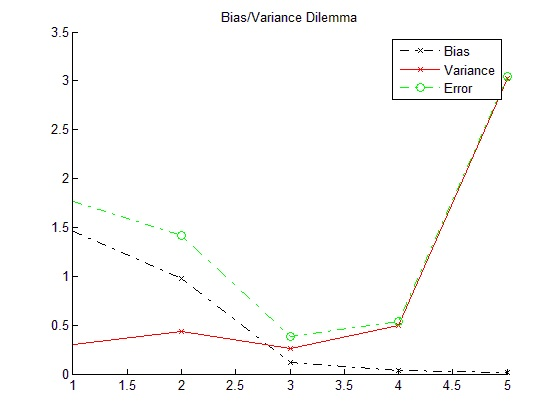

In [15]:
import pandas as pd
data = pd.read_csv("house_prices_multivariate.csv")
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [16]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['SalePrice']

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=0.3)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

38967.63075651183

In [19]:
lasso_model=Lasso(alpha=140, max_iter=100000, random_state=9)

# fit the model on one set of data
lasso_model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

39040.926173205786

In [21]:
ridge_model=Ridge(alpha=0.00001, max_iter=100000, random_state=9)

# fit the model on one set of data
ridge_model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.01715e-16): result may not be accurate.
  overwrite_a=True).T


38967.63091430448

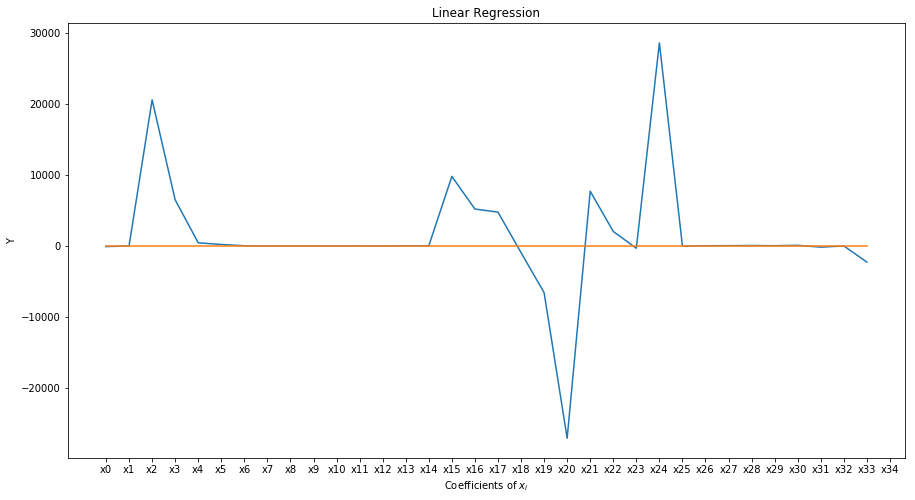

In [22]:
linear_coef = linear_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(linear_coef)), linear_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Linear Regression')
plt.show()

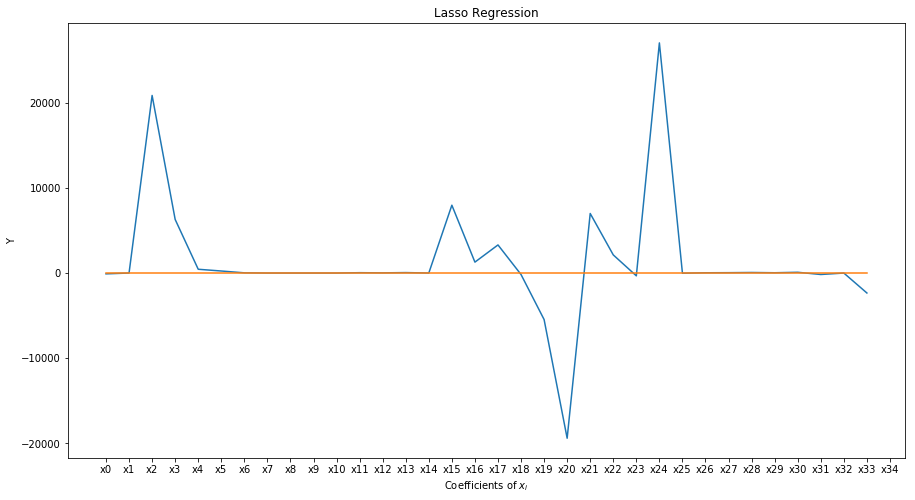

In [23]:
lasso_coef = lasso_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Lasso Regression')
plt.show()

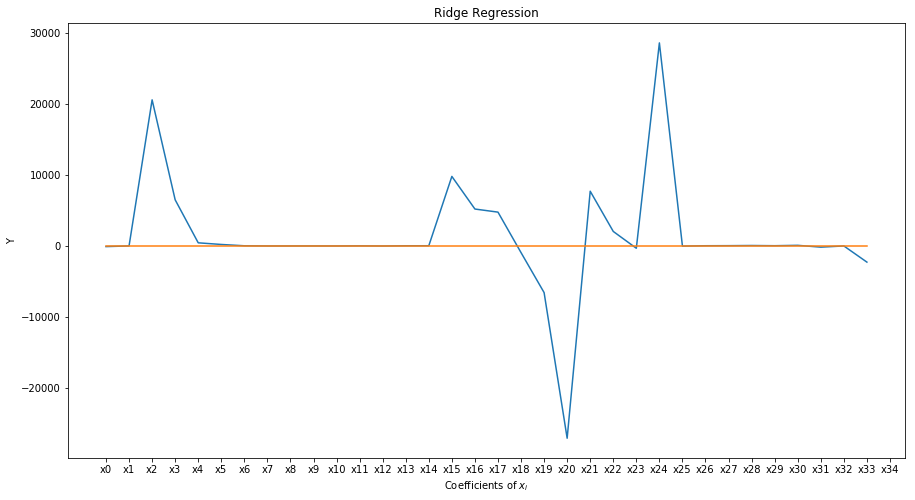

In [24]:
ridge_coef = ridge_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(ridge_coef)), ridge_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Ridge Regression')
plt.show()

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Model validation via Cross-Validation
***
<br />
- Disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.
- This is not optimal, and can cause problems – especially if the initial set of training data is small.
- One way to address this is to use cross-validation; do a sequence of fits where each subset of the data is used both as a       training set and as a validation set.

Here we do two validation trials, alternately using each half of the data as a holdout set
Accuracy scores could be combined (by, say, taking the mean) to get a better measure of the global model performance.
This particular form of cross-validation is a two-fold cross-validation
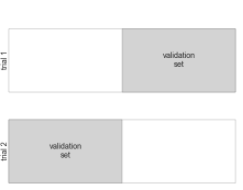

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Model validation through k-fold validation
***
<br />

- We could expand on this idea to use even more trials, and more folds in the data.
- Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data.
- We can use Scikit-Learn's cross_val_score convenience routine to do it succinctly

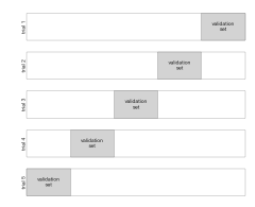

In [ ]:
#code for implementing k-fold validation
## Model validation through k-fold validationfrom sklearn.cross_validation import cross_val_score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
scores.mean()

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Hold-one-out (also known as Leave-one-out validation)
***
<br />

- In this approach, we reserve only one data-point of the available data set for testing.
- And, train model on the rest of data set. This process iterates for each data point.
- We make use of all data points, hence low bias.
- This approach leads to higher variation in testing model effectiveness because we test against one data point.
- So, our estimation gets highly influenced by the data point.
- If the data point turns out to be an outlier, it can lead to higher variation.

If we have 150 samples, the leave one out cross-validation yields scores for 150 trials,

In [ ]:
#code to implement Hold-one-out validation
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X,y, scoring="neg_mean_squared_error", cv=LeaveOneOut(X.shape[0]))
print ("mean score:", scores.mean())
print ("shape:", scores.shape[0])